# Morality Treatment Effect in Debt Repayment Observation

#### ===================================================================================================================

### GadjahKembar's Final Project of Comfest 12 : Moral Incentives on Debt Repayment

#### Member of GadjahKembar:
   #####        - Wilson Wiranda
   #####        - Gabriella Christina Kandinata
   #####        - Rheco Paradhika Kusuma

#### ===================================================================================================================

# **Import**

---
Data, Packages, etc.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('default_sample.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               6979 non-null   float64
 1   amount_repaid                     6979 non-null   int64  
 2   amount_spent_next1month           6979 non-null   int64  
 3   cash_rebate                       6979 non-null   int64  
 4   cash_rebate_amount                0 non-null      float64
 5   credit_rep                        6979 non-null   int64  
 6   credit_rep_plus_moral_rel         6979 non-null   int64  
 7   credit_rep_version                2000 non-null   float64
 8   creditlimit                       6979 non-null   float64
 9   crowding_out_exp                  6979 non-null   int64  
 10  ctrl                              6979 non-null   int64  
 11  debt_to_income                    2979 non-null   float64
 12  debt_t

In [5]:
df.describe()

,age,amount_repaid,amount_spent_next1month,cash_rebate,cash_rebate_amount,credit_rep,credit_rep_plus_moral_rel,credit_rep_version,creditlimit,crowding_out_exp,...,weight,prediction,high_credit_risk,low_credit_risk,religious_province,religious_province_moral,high_credit_risk_50,high_credit_risk_75,high_credit_risk_90,high_credit_risk_95
count,6979.000000,6.979000e+03,6.979000e+03,6979.0,0.0,6979.000000,6979.0,2000.000000,6979.000000,6979.0,...,6979.000000,6979.000000,6979.000000,6979.000000,6979.000000,2979.000000,6979.000000,6979.000000,6979.000000,6979.000000
mean,42.045171,6.726299e+05,1.129220e+06,0.0,NaN,0.286574,0.0,1.500000,13.619072,0.0,...,1.120648,0.054104,0.102737,0.897263,0.376272,0.122189,0.506806,0.253761,0.102737,0.049864
std,9.070359,1.959770e+06,3.238733e+06,0.0,NaN,0.452193,0.0,0.500125,9.414232,0.0,...,0.625274,0.039085,0.303637,0.303637,0.484484,0.327559,0.499989,0.435194,0.303637,0.217679
min,22.166666,0.000000e+00,0.000000e+00,0.0,NaN,0.000000,0.0,1.000000,4.000000,0.0,...,1.000000,-0.052320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.166668,0.000000e+00,0.000000e+00,0.0,NaN,0.000000,0.0,1.000000,10.000000,0.0,...,1.000000,0.028717,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.666664,0.000000e+00,0.000000e+00,0.0,NaN,0.000000,0.0,1.500000,10.000000,0.0,...,1.000000,0.049623,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,48.374998,8.000000e+05,1.000000e+06,0.0,NaN,1.000000,0.0,2.000000,15.000000,0.0,...,1.000000,0.074494,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,91.666664,4.001350e+07,7.874759e+07,0.0,NaN,1.000000,0.0,2.000000,75.000000,0.0,...,4.910891,0.536855,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(df.shape, "\n")
print(df.head())

(6979, 72) 

         age  amount_repaid  amount_spent_next1month  cash_rebate  \
0  40.250000         484000                        0            0   
1  56.000000              0                        0            0   
2  26.333334              0                  1745370            0   
3  32.333332        1410000                  1040000            0   
4  41.000000         600000                        0            0   

   cash_rebate_amount  credit_rep  credit_rep_plus_moral_rel  \
0                 NaN           1                          0   
1                 NaN           0                          0   
2                 NaN           0                          0   
3                 NaN           0                          0   
4                 NaN           1                          0   

   credit_rep_version  creditlimit  crowding_out_exp  ...  weight  prediction  \
0                 2.0         10.0                 0  ...     1.0    0.054791   
1                 NaN    

# **Exploratory Data Analysis**

## No 1
Which one of the following treatments that affects debt repayment rate the most :
religious moral incentive, non-religious moral incentive, financial incentive, credit
reputation?

---



In [7]:
df_1 = df.copy()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               6979 non-null   float64
 1   amount_repaid                     6979 non-null   int64  
 2   amount_spent_next1month           6979 non-null   int64  
 3   cash_rebate                       6979 non-null   int64  
 4   cash_rebate_amount                0 non-null      float64
 5   credit_rep                        6979 non-null   int64  
 6   credit_rep_plus_moral_rel         6979 non-null   int64  
 7   credit_rep_version                2000 non-null   float64
 8   creditlimit                       6979 non-null   float64
 9   crowding_out_exp                  6979 non-null   int64  
 10  ctrl                              6979 non-null   int64  
 11  debt_to_income                    2979 non-null   float64
 12  debt_t

In [8]:
df_1.drop(['cash_rebate_amount','credit_rep_version', 'debt_to_income', 'debt_to_income_moral', 'male', 'male_moral', 'muslim_moral', 'old', 'old_moral', 'poor_credit_history_moral', 'savings_15', 'savings_18', 'savings_reduced', 'time_lag_first_moral', 'treatment_repeated', 'ctrl_extra_weight' ,'treatment', 'province_name', 'treatment_wave1', 'treatment_wave2', 'treatment_wave3', 'treatment_wave4', 'treatment_wave5', 'treatment_wave6', 'type_obs', 'religious_province_moral'], inplace=True, axis=1)

In [9]:
#Analisis Regresi

#Default
import statsmodels.api as sm
target_col=['default']
cols = [i for i in df_1.columns if i not in target_col]
y = df_1['default']
x = df_1[cols]
x_data = sm.add_constant(x)

In [10]:
results = sm.OLS(y,x_data).fit()
results.summary()

D:\Miniconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                default   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     33.13
Date:                Sat, 15 Aug 2020   Prob (F-statistic):          4.64e-171
Time:                        09:54:46   Log-Likelihood:                 458.22
No. Observations:                6979   AIC:                            -856.4
Df Residuals:                    6949   BIC:                            -650.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
age                              -6.926e-05      0.000     -0.215      0.830      -0.001       0.001
amount_repaid                    -4.176e-09    1.8e-09     -2.317      0.021   -7.71e-09   -6.43e-10
amount_spent_next1month          -2.395e-09   9.74e-10     -2.459      0.014    -4.3e-09   -4.85e-10
cash_rebate                       4.164e-07   1.97e-06      0.211      0.833   -3.44e-06    4.28e-06
credit_rep                          -0.0037      0.005     -0.748      0.454      -0.014       0.006
credit_rep_plus_moral_rel         1.907e-07   7.75e-07      0.246      0.806   -1.33e-06    1.71e-06
creditlimit                         -0.0020      0.000     -4.915      0.000      -0.003      -0.001
crowding_out_exp                 -1.678e-07   2.63e-07     -0.637      0.524   -6.84e-07    3.48e-07
ctrl                                 0.0218      0.006      3.816      0.000       0.011       0.033
delinquent                           0.0731      0.007     10.905      0.000       0.060       0.086
female                              -0.0088      0.006     -1.428      0.153      -0.021       0.003
followup_exp                      -5.47e-06   1.99e-06     -2.747      0.006   -9.37e-06   -1.57e-06
income                           -2.155e-06   3.23e-06     -0.667      0.505   -8.49e-06    4.18e-06
late_2016                           -0.0642      0.007     -9.874      0.000      -0.077      -0.051
main_exp                             0.0242      0.008      3.047      0.002       0.009       0.040
min_payment                       4.931e-08   3.76e-09     13.099      0.000    4.19e-08    5.67e-08
moral_all                           -0.0022      0.002     -0.902      0.367      -0.007       0.003
moral_first                         -0.0022      0.002     -0.902      0.367      -0.007       0.003
moral_imp                          1.27e-16   9.17e-17      1.385      0.166   -5.28e-17    3.07e-16
moral_non                         1.296e-16   9.85e-17      1.316      0.188   -6.35e-17    3.23e-16
moral_rel                           -0.0022      0.002     -0.902      0.367      -0.007       0.003
moral_repeated                   -9.456e-17   8.66e-17     -1.091      0.275   -2.64e-16    7.53e-17
muslim                               0.0026      0.010      0.255      0.799      -0.018       0.023
outstanding                      -6.136e-08   5.09e-08     -1.204      0.229   -1.61e-07    3.85e-08
p_usage_next1month                  -0.0871      0.006    -13.983      0.000      -0.099      -0.075
poor_credit_history                 -0.0019      0.007     -0.275      0.783      -0.015       0.011
province                            -0.0002      0.000     -0.481      0.630      -0.001       0.001
randomcardnumber                 -1.001e-14    9.5e-1

In [11]:
#deliquent
import statsmodels.api as sm
target_col=['delinquent']
cols = [i for i in df_1.columns if i not in target_col]
y_del = df_1['delinquent']
x_del = df_1[cols]
x_data_del = sm.add_constant(x_del)

In [12]:
results_del = sm.OLS(y_del,x_data_del).fit()
results_del.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             delinquent   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:54:46   Log-Likelihood:                -3547.6
No. Observations:                6979   AIC:                             7155.
Df Residuals:                    6949   BIC:                             7361.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
age                                 -0.0012      0.001     -2.024      0.043      -0.002   -3.63e-05
amount_repaid                    -7.902e-08   3.06e-09    -25.851      0.000    -8.5e-08    -7.3e-08
amount_spent_next1month           1.485e-08   1.72e-09      8.631      0.000    1.15e-08    1.82e-08
cash_rebate                       2.114e-05   3.46e-06      6.115      0.000    1.44e-05    2.79e-05
credit_rep                          -0.0057      0.009     -0.644      0.520      -0.023       0.012
credit_rep_plus_moral_rel         2.372e-06   1.32e-06      1.803      0.071   -2.07e-07    4.95e-06
creditlimit                         -0.0006      0.001     -0.876      0.381      -0.002       0.001
crowding_out_exp                  2.288e-07   5.01e-07      0.457      0.648   -7.54e-07    1.21e-06
ctrl                                 0.1100      0.010     10.932      0.000       0.090       0.130
default                              0.2303      0.021     10.904      0.000       0.189       0.272
female                              -0.0022      0.011     -0.204      0.838      -0.024       0.019
followup_exp                     -1.493e-05   1.89e-06     -7.890      0.000   -1.86e-05   -1.12e-05
income                            4.522e-06   5.74e-06      0.788      0.431   -6.73e-06    1.58e-05
late_2016                           -0.0371      0.012     -3.193      0.001      -0.060      -0.014
main_exp                             0.2656      0.014     19.344      0.000       0.239       0.292
min_payment                       1.376e-08   6.76e-09      2.034      0.042    5.01e-10     2.7e-08
moral_all                            0.0136      0.004      3.113      0.002       0.005       0.022
moral_first                          0.0136      0.004      3.111      0.002       0.005       0.022
moral_imp                        -1.176e-15   5.64e-16     -2.084      0.037   -2.28e-15   -6.96e-17
moral_non                        -1.259e-16   2.14e-17     -5.872      0.000   -1.68e-16   -8.39e-17
moral_rel                            0.0136      0.004      3.111      0.002       0.005       0.022
moral_repeated                    -1.37e-16   8.39e-17     -1.633      0.103   -3.01e-16    2.75e-17
muslim                              -0.0139      0.018     -0.757      0.449      -0.050       0.022
outstanding                      -1.313e-07   9.05e-08     -1.450      0.147   -3.09e-07    4.62e-08
p_usage_next1month                  -0.1348      0.011    -12.152      0.000      -0.157      -0.113
poor_credit_history                  0.1734      0.012     14.640      0.000       0.150       0.197
province                            -0.0002      0.001     -0.238      0.812      -0.002       0.001
randomcardnumber                   8.32e-15   1.69e-1

## No 2
How many customers are being delinquent repeatedly for more than twice?

---
Berdasarkan random credit number, maka terdapat 1 customer yang delinquent sebanyak lebih dari 2 kali


In [13]:
df_2 = df.copy()
df_2 = df_2.groupby('randomcardnumber')['delinquent'].sum().loc[lambda p: p > 2]
df_2

randomcardnumber
256274000075    3
Name: delinquent, dtype: int64

## No 3
How is the profile of the default customer?

---



In [14]:
df_3 = df.copy()

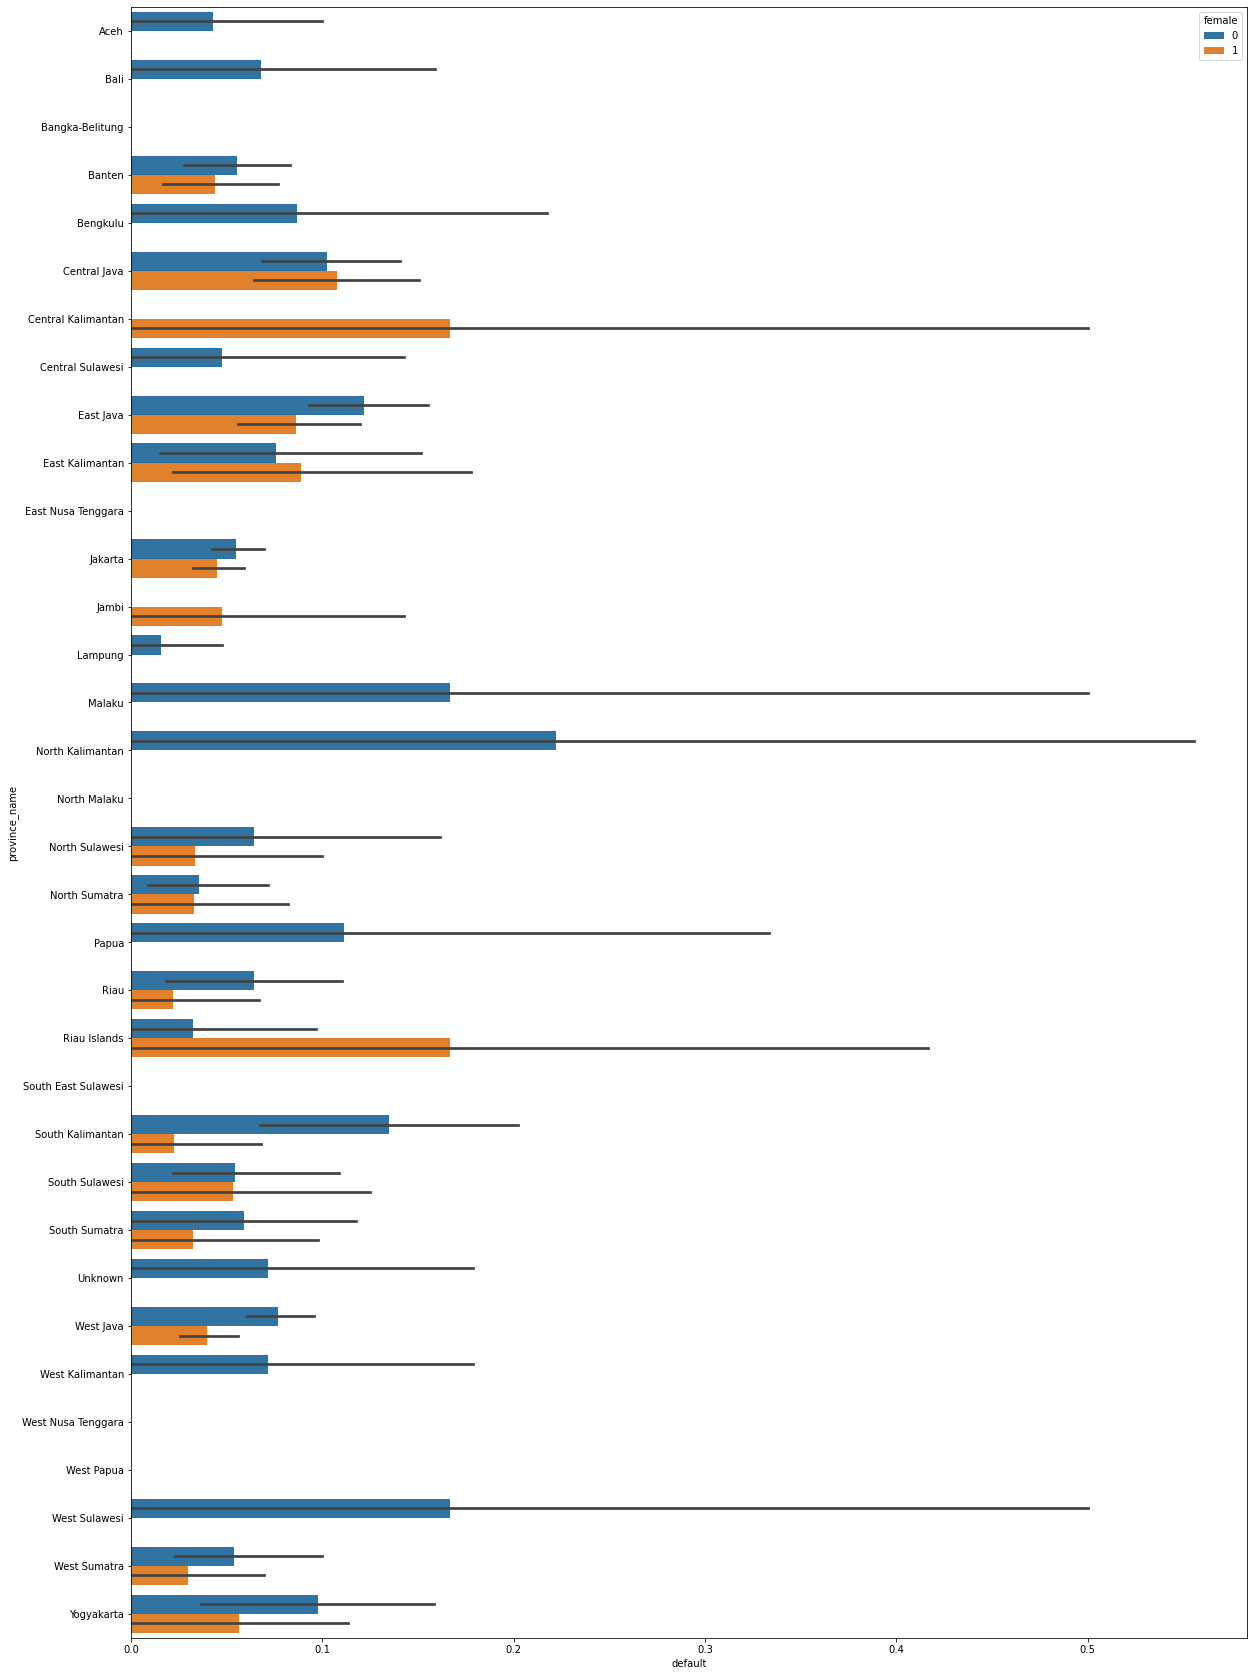

In [15]:
plt.figure(figsize=(20,30))
sns.barplot(y=df_3.province_name, x=df_3.default, hue=df_3.female)

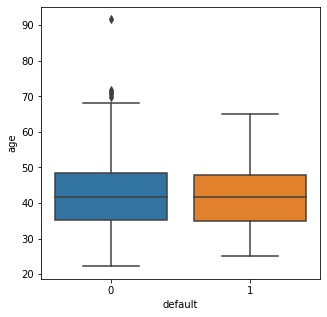

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df_3.age, x=df_3.default)

In [17]:
df_31 = df_3[['poor_credit_history', 'default']]
df_31 = df_31.groupby('poor_credit_history').count()
df_31

,default
poor_credit_history,
0,4638
1,2341


In [18]:
df_muslim = df_3[['muslim', 'default']]
df_muslim = df_muslim.groupby('muslim').count()
df_muslim

,default
muslim,
0,565
1,6414


In [19]:
df_wave = df_3[['wave', 'default']]
df_wave = df_wave.groupby('wave').count()
df_wave

,default
wave,
1,2476
2,2683
3,1820


In [20]:
df_sb = df_3[['sample_before', 'default']]
df_sb = df_sb.groupby('sample_before').count()
df_sb

,default
sample_before,
0,6489
1,490


##No 4
How is the profile of predicted high-risk customers?

---



In [21]:
df_4 = df.copy()

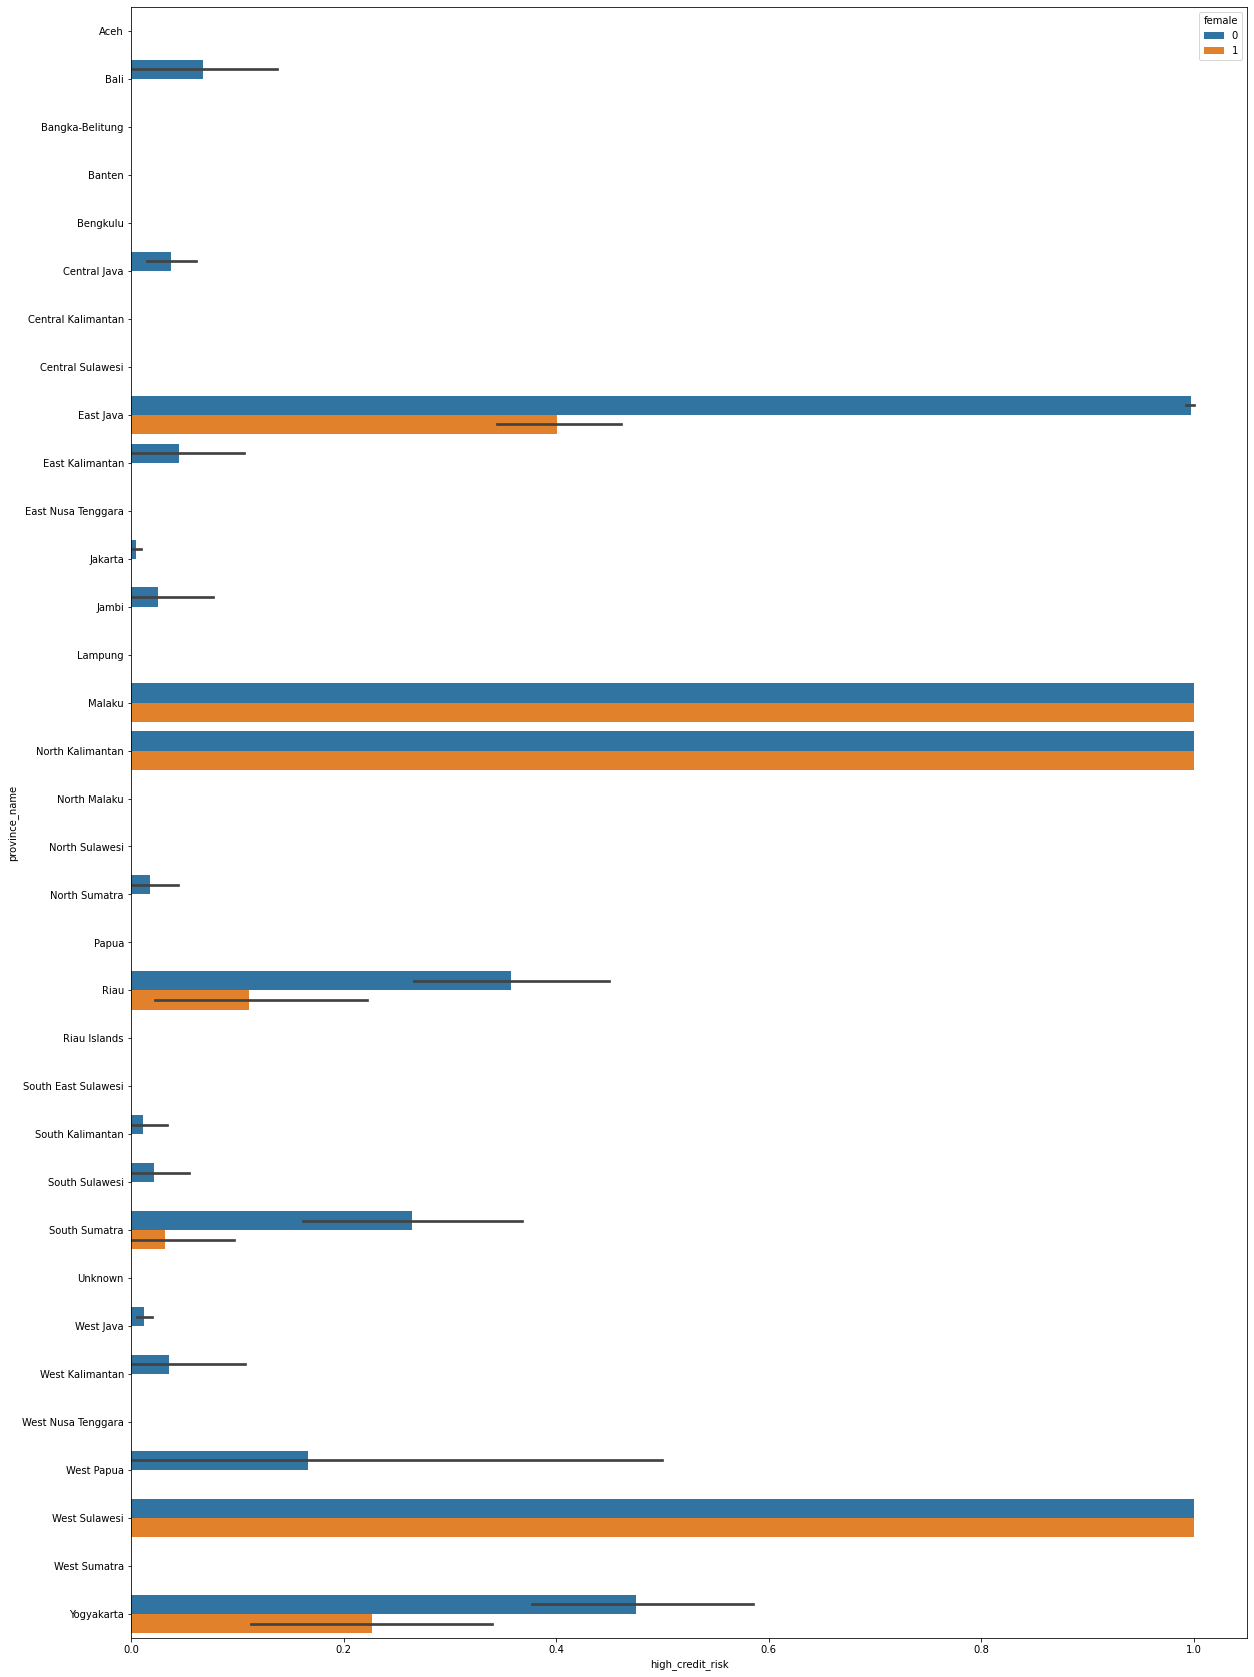

In [22]:
plt.figure(figsize=(20,30))
sns.barplot(y=df_4.province_name, x=df_4.high_credit_risk, hue=df_4.female)

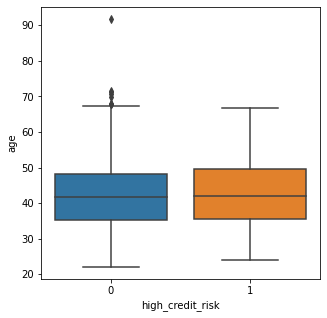

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df_4.age, x=df_4.high_credit_risk)

In [24]:
df_41 = df_4[['poor_credit_history', 'high_credit_risk']]
df_41 = df_41.groupby('poor_credit_history').count()
df_41

,high_credit_risk
poor_credit_history,
0,4638
1,2341


In [25]:
df_muslim_4 = df_4[['muslim', 'high_credit_risk']]
df_muslim_4 = df_muslim_4.groupby('muslim').count()
df_muslim_4

,high_credit_risk
muslim,
0,565
1,6414


In [26]:
df_wave_4 = df_4[['wave', 'high_credit_risk']]
df_wave_4 = df_wave_4.groupby('wave').count()
df_wave_4

,high_credit_risk
wave,
1,2476
2,2683
3,1820


In [27]:
df_sb_4 = df_4[['sample_before', 'high_credit_risk']]
df_sb_4 = df_sb_4.groupby('sample_before').count()
df_sb_4

,high_credit_risk
sample_before,
0,6489
1,490


## No 5
Do you think, the default customers are the ones who are financially not able to pay their
debt? Please explain your answer!

---



In [28]:
df_5 = df.copy()
df_5 = df_5[['delinquent', 'default']]
df_5 = df_5.groupby('delinquent').count()
df_5

,default
delinquent,
0,2642
1,4337


# **Data Preprocessing**

## Periksa Missing Value

In [29]:
pip install jcopml

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in d:\miniconda3\lib\site-packages (from jcopml) (1.5.0)

  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33236 sha256=7dfa768e15f9daf6e0ed822e94e758b027974bc7be8faf4eb37333f6749863ee
  Stored in directory: c:\users\wilso\appdata\local\pip\cache\wheels\1e\b0\7a\2e3db99fcf3707a61b80c5193e1155acc8eaf730c510424c6b
Successfully built jcopml


In [30]:
from jcopml.plot import plot_missing_value

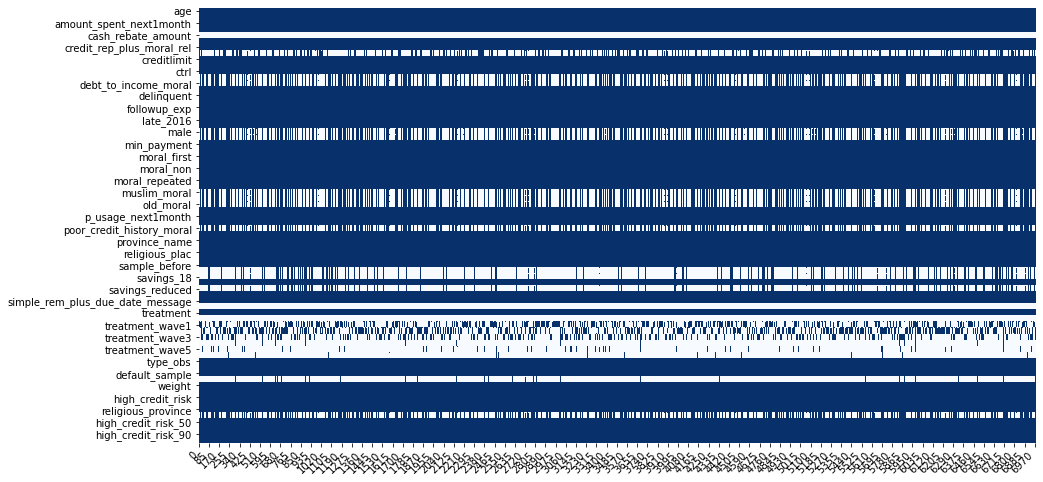

In [31]:
plot_missing_value(df)

## Heatmap Correlation

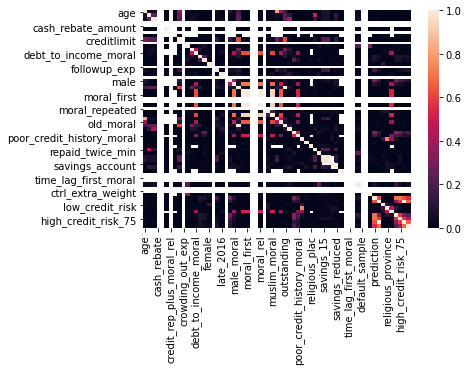

In [32]:
ax = sns.heatmap(df.corr(), vmin=0, vmax=1)
ax

## Drop Columns

---
Buang kolom yang tidak dipakai untuk model

In [33]:
df.drop(['amount_repaid', 'amount_spent_next1month', 'cash_rebate',
       'cash_rebate_amount', 'credit_rep_plus_moral_rel',
       'credit_rep_version', 'crowding_out_exp',
       'debt_to_income', 'debt_to_income_moral', 'delinquent',
       'followup_exp', 'late_2016', 'main_exp', 'male',
       'male_moral', 'min_payment', 'moral_all', 'moral_first', 'moral_imp',
       'moral_non', 'moral_repeated', 'muslim_moral',
       'old', 'old_moral', 'outstanding', 'p_usage_next1month','poor_credit_history_moral', 'province_name',
       'randomcardnumber',
       'repaid_twice_min', 'savings_15', 'savings_18',
       'savings_account', 'savings_reduced',
       'simple_rem_plus_due_date_message', 'time_lag_first_moral', 'treatment',
       'treatment_repeated', 'type_obs', 'treatment_wave1', 'treatment_wave2', 'treatment_wave3', 'treatment_wave4', 'treatment_wave5', 'treatment_wave6', 'default_sample',
       'ctrl_extra_weight', 'weight', 'prediction', 'high_credit_risk',
       'low_credit_risk', 'religious_province', 'religious_province_moral',
       'high_credit_risk_50', 'high_credit_risk_75', 'high_credit_risk_90',
       'high_credit_risk_95'], inplace=True, axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6979 entries, 0 to 6978
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  6979 non-null   float64
 1   credit_rep           6979 non-null   int64  
 2   creditlimit          6979 non-null   float64
 3   ctrl                 6979 non-null   int64  
 4   default              6979 non-null   int64  
 5   female               6979 non-null   int64  
 6   income               6979 non-null   float64
 7   moral_rel            6979 non-null   int64  
 8   muslim               6979 non-null   int64  
 9   poor_credit_history  6979 non-null   int64  
 10  province             6979 non-null   int64  
 11  religious_plac       6979 non-null   int64  
 12  sample_before        6979 non-null   int64  
 13  simple_rem           6979 non-null   int64  
 14  wave                 6979 non-null   int64  
dtypes: float64(3), int64(12)
memory usage:

## Heatmap correlation after drop

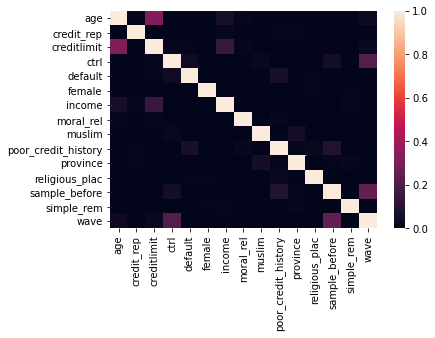

In [35]:
ax = sns.heatmap(df.corr(), vmin=0, vmax=1)
ax

## SMOTE

In [36]:
y=df["default"]
x=df.drop(columns="default")

In [37]:
target_col_smote=['default']
    
##seperating dependent and independent variables on training and testing data
cols_smote    = [i for i in df.columns if i not in target_col_smote]

In [38]:
cols_smote

['age',
 'credit_rep',
 'creditlimit',
 'ctrl',
 'female',
 'income',
 'moral_rel',
 'muslim',
 'poor_credit_history',
 'province',
 'religious_plac',
 'sample_before',
 'simple_rem',
 'wave']

In [83]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_sample(x,y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=cols_smote)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=target_col_smote)

## Split Data

In [84]:
x_train, x_test, y_train, y_test = train_test_split(train_smote_X, train_smote_Y, test_size=0.25, random_state=42)

In [85]:
x_train.shape

(9816, 14)

In [86]:
y_train.shape

(9816, 1)

In [88]:
y_train=y_train.values.ravel()

# **Model**


## KNN + Tuning

### KNN biasa

In [89]:
kneigh= KNeighborsClassifier(n_neighbors=5)
kneigh.fit(x_train,y_train)

KNeighborsClassifier()

In [90]:
kneigh.score(x_train,y_train), kneigh.score(x_test,y_test)

(0.8777506112469438, 0.8160146699266504)

In [91]:
kneigh=KNeighborsClassifier(n_neighbors=5)
cross_val_score(kneigh,x,y,cv=10)

array([0.93123209, 0.9226361 , 0.93409742, 0.93696275, 0.93409742,
       0.93409742, 0.93696275, 0.93696275, 0.93553009, 0.93687231])

In [92]:
cross_val_score(kneigh,x,y,cv=10).mean()

0.9339451106461176

### Dengan menggunakan data scaled

In [93]:
scaler=MinMaxScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [94]:
kneigh=KNeighborsClassifier(n_neighbors=5)
kneigh.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [95]:
kneigh.score(x_train_scaled,y_train),kneigh.score(x_test_scaled,y_test)

(0.9328647106764466, 0.906479217603912)

In [96]:
kneigh=KNeighborsClassifier(n_neighbors=5)
kneigh.fit(x_train, y_train)
pred=kneigh.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1123  562]
 [  40 1547]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1685
           1       0.73      0.97      0.84      1587

    accuracy                           0.82      3272
   macro avg       0.85      0.82      0.81      3272
weighted avg       0.85      0.82      0.81      3272



### Tuning n_neighbor tanpa scaling

Max test score: 0.8863080684596577
n_neighbor: 0


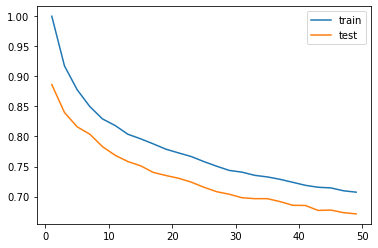

In [97]:
neighbor=range(1,51,2)
train_score=[]
test_score=[]

for k in neighbor:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)

  train_score.append(knn.score(x_train,y_train))
  test_score.append(knn.score(x_test,y_test))

import matplotlib.pyplot as plt
plt.plot(neighbor,train_score,label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

maxtestscore=np.max(test_score)
argmaxtestscore=np.argmax(test_score)
print("Max test score:", maxtestscore)
print("n_neighbor:", argmaxtestscore)

In [50]:
kneigh=KNeighborsClassifier(n_neighbors=5)
kneigh.fit(x_train, y_train)
pred=kneigh.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[[1123  562]
 [  39 1548]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79      1685
           1       0.73      0.98      0.84      1587

    accuracy                           0.82      3272
   macro avg       0.85      0.82      0.81      3272
weighted avg       0.85      0.82      0.81      3272



### Tuning n_neighbor dengan scaling

Max test score: 0.9156479217603912
n_neighbor: 0


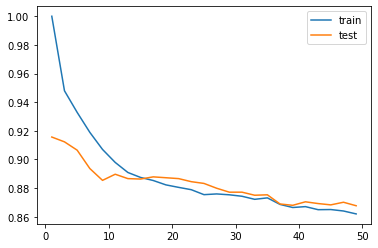

In [98]:
neighbor=range(1,51,2)
train_score=[]
test_score=[]
for k in neighbor:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_scaled,y_train)

  train_score.append(knn.score(x_train_scaled,y_train))
  test_score.append(knn.score(x_test_scaled,y_test))

import matplotlib.pyplot as plt
plt.plot(neighbor,train_score,label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

maxtestscore=np.max(test_score)
argmaxtestscore=np.argmax(test_score)
print("Max test score:", maxtestscore)
print("n_neighbor:", argmaxtestscore)

In [99]:
kneigh=KNeighborsClassifier(n_neighbors=3)
kneigh.fit(x_train, y_train)
pred=kneigh.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1211  474]
 [  50 1537]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1685
           1       0.76      0.97      0.85      1587

    accuracy                           0.84      3272
   macro avg       0.86      0.84      0.84      3272
weighted avg       0.87      0.84      0.84      3272



### Tuning n_neighbor dengan weight by distance

Max test score: 0.9208435207823961
n_neighbor: 15


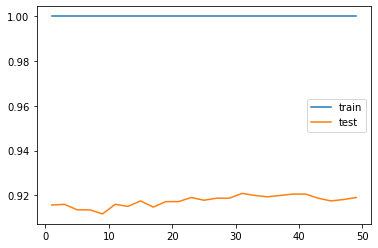

In [100]:
neighbor=range(1,51,2)
train_score=[]
test_score=[]
for k in neighbor:
  knn=KNeighborsClassifier(n_neighbors=k, weights="distance")
  knn.fit(x_train_scaled,y_train)

  train_score.append(knn.score(x_train_scaled,y_train))
  test_score.append(knn.score(x_test_scaled,y_test))

import matplotlib.pyplot as plt
plt.plot(neighbor,train_score,label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

maxtestscore=np.max(test_score)
argmaxtestscore=np.argmax(test_score)
print("Max test score:", maxtestscore)
print("n_neighbor:", argmaxtestscore)

### Eucledian Distance

Max test score: 0.9208435207823961
n_neighbor: 15


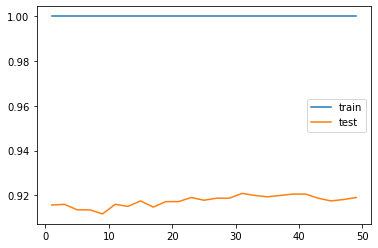

In [101]:
neighbor=range(1,51,2)
train_score=[]
test_score=[]
for k in neighbor:
  knn=KNeighborsClassifier(n_neighbors=k, weights="distance",p=2)
  knn.fit(x_train_scaled,y_train)

  train_score.append(knn.score(x_train_scaled,y_train))
  test_score.append(knn.score(x_test_scaled,y_test))

import matplotlib.pyplot as plt
plt.plot(neighbor,train_score,label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

maxtestscore=np.max(test_score)
argmaxtestscore=np.argmax(test_score)
print("Max test score:", maxtestscore)
print("n_neighbor:", argmaxtestscore)

In [102]:
kneigh=KNeighborsClassifier(n_neighbors=14)
kneigh.fit(x_train, y_train)
pred=kneigh.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1015  670]
 [  85 1502]]
              precision    recall  f1-score   support

           0       0.92      0.60      0.73      1685
           1       0.69      0.95      0.80      1587

    accuracy                           0.77      3272
   macro avg       0.81      0.77      0.76      3272
weighted avg       0.81      0.77      0.76      3272



## DecisionTree

In [103]:
#DTC
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train, y_train)
y_pred_DTC = model_DTC.predict(x_test) # prediksi

In [104]:
#importing confusion matrix
confusion = confusion_matrix(y_test, y_pred_DTC)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[1473  212]
 [  90 1497]]


In [105]:
accuracy_DTC = accuracy_score(y_test, y_pred_DTC)
print("Accuracy: %.2f%%" % (accuracy_DTC * 100.0))

Accuracy: 90.77%


In [106]:
model_DTC.score(x_train,y_train), model_DTC.score(x_test,y_test)

(1.0, 0.9077017114914425)

In [107]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_DTC, target_names=['not default', 'default']))


Classification Report

              precision    recall  f1-score   support

 not default       0.94      0.87      0.91      1685
     default       0.88      0.94      0.91      1587

    accuracy                           0.91      3272
   macro avg       0.91      0.91      0.91      3272
weighted avg       0.91      0.91      0.91      3272



In [108]:
# auc scores
auc_score_DTC = roc_auc_score(y_test, y_pred_DTC[:])
auc_score_DTC

0.9087366006069343

## Model XGBoost

In [109]:
#XGb

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)

In [110]:
#importing confusion matrix
confusion = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[1619   66]
 [ 117 1470]]


In [111]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 94.41%


In [112]:
model_xgb.score(x_train,y_train), model_xgb.score(x_test,y_test)

(0.9769763651181744, 0.9440709046454768)

In [113]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_xgb, target_names=['not default', 'default']))


Classification Report

              precision    recall  f1-score   support

 not default       0.93      0.96      0.95      1685
     default       0.96      0.93      0.94      1587

    accuracy                           0.94      3272
   macro avg       0.94      0.94      0.94      3272
weighted avg       0.94      0.94      0.94      3272



In [114]:
# auc scores
auc_score_xgb = roc_auc_score(y_test, y_pred_xgb[:])
auc_score_xgb

0.943553426486344

In [115]:
# roc curve for models
fpr_xgb, tpr_xgb, thresh_xgb = roc_curve(y_test, y_pred_xgb[:], pos_label=xgb)

D:\Miniconda3\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [116]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr_xgb, p_tpr_xgb, _ = roc_curve(y_test, random_probs, pos_label=xgb)